In [45]:
import pandas as pd 
df = pd.read_csv('nba_2013.csv')

In [2]:
df.head()


,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


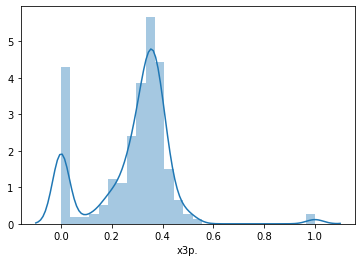

In [7]:
import seaborn as sns
sns.distplot(df['x3p.'])

In [46]:
df['x3p.1'] = df['x3p.'].fillna(df['x3p.'].median())

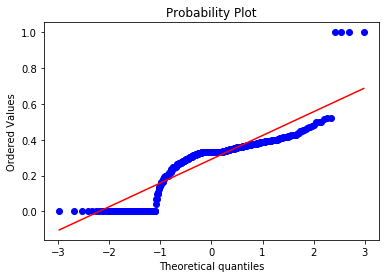

In [4]:
import scipy.stats as stats
import pylab
import numpy as np
import matplotlib.pyplot as plt
stats.probplot(df['x3p.1'],plot=pylab)
plt.show()

In [5]:
print(np.std(df['x3p.1']))
print(np.std(df['x3p.']))

0.14692681989934583
0.1574423640051081


In [6]:
sns.distplot(df['x3p.1'])

NameError: name 'sns' is not defined

In [47]:
df['x3p.'] = df['x3p.1']

In [48]:
df.drop('x3p.1',axis = 1,inplace = True)

In [80]:
df.

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.             0
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

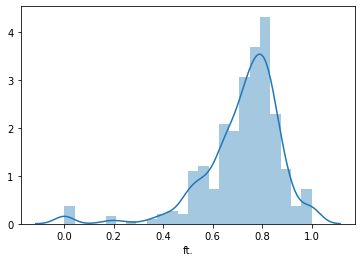

In [82]:
sns.distplot(df['ft.'])

In [49]:
df['ft.1'] = df['ft.'].fillna(df['ft.'].median())

In [98]:
print(np.std(df['ft.1']))
print(np.std(df['ft.']))

0.15673468143916067
0.15999235474932735


In [50]:
df['ft.'] = df['ft.1']

In [51]:
df.drop('ft.1',axis = 1,inplace = True)

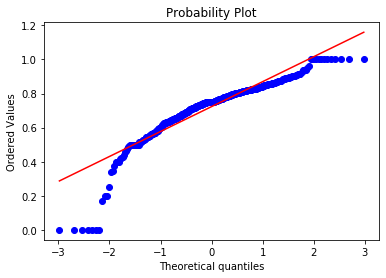

In [101]:
import scipy.stats as stats
import pylab
import numpy as np
import matplotlib.pyplot as plt
stats.probplot(df['ft.'],plot=pylab)
plt.show()

In [52]:
df.isnull().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             2
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            3
efg.            2
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

In [53]:
df.dropna(inplace = True)

In [54]:
df.drop(['season','season_end'],axis = 1,inplace = True)

In [55]:
df.drop('player',axis = 1,inplace = True)

In [56]:
df.drop('bref_team_id',axis = 1,inplace = True)

In [57]:
import numpy as np
df['pos'] = np.where((df['pos'] == 'G') | (df['pos'] == 'F' ) ,'SG',df['pos'])

In [60]:
#df1  = pd.get_dummies(df['pos'],drop_first=True)
df=pd.get_dummies(columns=['pos'],drop_first=True,data=df)

In [62]:
df.columns

Index(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.',
       'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'pos_PF', 'pos_PG', 'pos_SF',
       'pos_SG'],
      dtype='object')

In [64]:
df.isnull().sum()

age       0
g         0
gs        0
mp        0
fg        0
fga       0
fg.       0
x3p       0
x3pa      0
x3p.      0
x2p       0
x2pa      0
x2p.      0
efg.      0
ft        0
fta       0
ft.       0
orb       0
drb       0
trb       0
ast       0
stl       0
blk       0
tov       0
pf        0
pts       0
pos_PF    0
pos_PG    0
pos_SF    0
pos_SG    0
dtype: int64

In [65]:
X = df.drop('pts',axis = 1)
y = df['pts']

In [66]:
#Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
m1 = ExtraTreesRegressor()
m1.fit(X,y)

ExtraTreesRegressor()

In [121]:
print(m1.feature_importances_)

[3.98266354e-04 5.04942804e-03 6.60741117e-03 1.31748303e-01
 2.67259252e-01 3.19995651e-01 4.46133361e-04 1.11541459e-03
 3.72280094e-03 5.36898694e-04 4.43597650e-02 7.25228719e-02
 8.09087305e-04 1.05994731e-03 5.64217299e-02 4.69446288e-02
 9.03464385e-04 3.62907366e-04 4.26457736e-04 1.56775333e-03
 5.79338667e-03 3.40676004e-04 4.15217155e-04 2.89259248e-02
 5.80168249e-04 7.77443135e-04 1.76563607e-04 5.42539589e-04
 1.89908547e-04]


In [99]:
print(t1)

Index(['fga', 'fg', 'mp', 'x2pa', 'ft', 'fta', 'x2p', 'tov', 'gs', 'ast', 'g',
       'x3pa'],
      dtype='object')


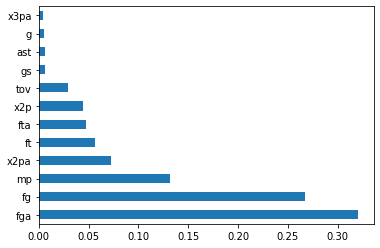

In [81]:
#plottin the feature importances
rank_features = pd.Series(m1.feature_importances_,index=X.columns)
rank_features.nlargest(12).plot.barh()
plt.show()

In [ ]:
rank_features.nlargest(12).index

In [101]:
X = df[['fga', 'fg', 'mp', 'x2pa', 'ft', 'fta', 'x2p', 'tov', 'gs', 'ast', 'g',
       'x3pa']]
y = df['pts']

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [107]:
#Scalin Dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled)

In [109]:
#Implementing GridsearchCV to get the value of K
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor

params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_



{'n_neighbors': 4}

In [110]:
# we can aslo use elbow curve to determine te number of k 

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 101.40399811315791
RMSE value for k=  2 is: 102.66659902595174
RMSE value for k=  3 is: 101.19880202287078
RMSE value for k=  4 is: 104.27772621239771
RMSE value for k=  5 is: 108.796933678196
RMSE value for k=  6 is: 111.23433791819308
RMSE value for k=  7 is: 112.56512728113711
RMSE value for k=  8 is: 112.82126245209598
RMSE value for k=  9 is: 114.32669051417163
RMSE value for k=  10 is: 116.99559494319054
RMSE value for k=  11 is: 118.65735257849232
RMSE value for k=  12 is: 121.08944680725243
RMSE value for k=  13 is: 122.21662016104742
RMSE value for k=  14 is: 123.98702106157465
RMSE value for k=  15 is: 124.98982193130668
RMSE value for k=  16 is: 127.66198913132685
RMSE value for k=  17 is: 131.25269673727615
RMSE value for k=  18 is: 132.35760240773274
RMSE value for k=  19 is: 133.64899585693584
RMSE value for k=  20 is: 135.1373931771744


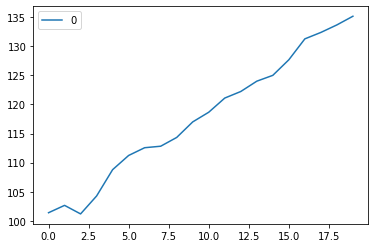

In [113]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

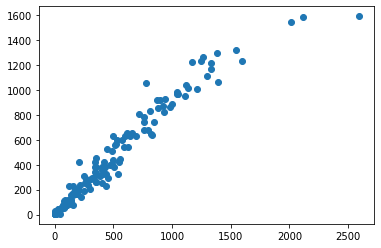

In [118]:
prediction = model.predict(X_test)
plt.scatter(y_test, prediction)

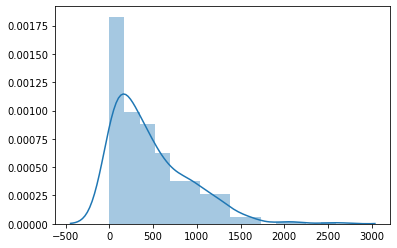

In [119]:
sns.distplot([y_test,prediction])

In [120]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE', metrics.mean_absolute_error(y_test, prediction))
print('MSE', metrics.mean_squared_error(y_test, prediction))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R squared error', r2_score(y_test, prediction))

MAE 71.83055555555556
MSE 18262.11503472222
RMSE 135.1373931771744
R squared error 0.9173550282842865
